In [298]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
matplotlib.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn import svm
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

## SVM Classification of Iris & Mushroom datasets

### Iris SVM: 

pred             Iris-setosa  Iris-versicolor  Iris-virginica
class                                                        
Iris-setosa                4                0               0
Iris-versicolor            0                3               1
Iris-virginica             0                0               2
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         4
 Iris-virginica       1.00      0.75      0.86         4
Iris-versicolor       0.67      1.00      0.80         2

    avg / total       0.93      0.90      0.90        10



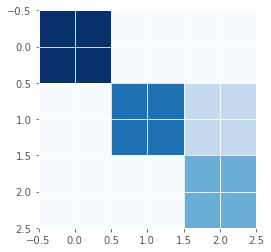

In [113]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris =pd.read_csv(url, header=None)
iris.columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width','class']

iris = shuffle(iris)
iris_X = iris[['sepal_length', 'sepal_width', 'petal_length','petal_width']]
iris_Y = iris[['class']]

np.random.seed(0)

iris_X_train = iris_X[:-10]
iris_y_train = iris_Y[:-10]
iris_X_test  = iris_X[-10:]
iris_y_test  = iris_Y[-10:]

svc = svm.SVC()
svc.fit(iris_X_train, iris_y_train) 

iris_y_test['pred'] = svc.predict(iris_X_test)

group_names = ['Iris-setosa','Iris-virginica','Iris-versicolor']
print (pd.crosstab(iris_y_test['class'], iris_y_test['pred']))
print(classification_report(iris_y_test['class'], iris_y_test['pred'], target_names=group_names))

cf = pd.crosstab(iris_y_test['class'], iris_y_test['pred'])
plt.imshow(cf, cmap='Blues')

### Mushroom SVM

pred     e    p
class          
e      100    0
p        0  100
             precision    recall  f1-score   support

          e       1.00      1.00      1.00       100
          p       1.00      1.00      1.00       100

avg / total       1.00      1.00      1.00       200



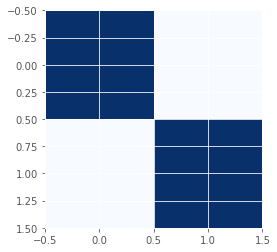

In [114]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
mushroom =pd.read_csv(url, header=None)
mushroom.columns = ["class",
"	cap-shape:	",
"	cap-surface:	",
"	cap-color:	",
"	bruises?:	",
"	odor:	",
"	gill-attachment:	",
"	gill-spacing:	",
"	gill-size:	",
"	gill-color:	",
"	stalk-shape:	",
"	stalk-root:	",
"	stalk-surface-above-ring:	",
"	stalk-surface-below-ring:	",
"	stalk-color-above-ring:	",
"	stalk-color-below-ring:	",
"	veil-type:	",
"	veil-color:	",
"	ring-number:	",
"	ring-type:	",
"	spore-print-color:	",
"	population:	",
"	habitat:	"]



mushroom = mushroom.set_index('class')

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(np.unique(mushroom.values))
mushroom = mushroom.apply(le.transform)


mushroom = mushroom.reset_index()

mushroom = shuffle(mushroom)
mushroom_X = mushroom[["	cap-shape:	",
"	cap-surface:	",
"	cap-color:	",
"	bruises?:	",
"	odor:	",
"	gill-attachment:	",
"	gill-spacing:	",
"	gill-size:	",
"	gill-color:	",
"	stalk-shape:	",
"	stalk-root:	",
"	stalk-surface-above-ring:	",
"	stalk-surface-below-ring:	",
"	stalk-color-above-ring:	",
"	stalk-color-below-ring:	",
"	veil-type:	",
"	veil-color:	",
"	ring-number:	",
"	ring-type:	",
"	spore-print-color:	",
"	population:	",
"	habitat:	"]]
mushroom_Y = mushroom[['class']]

np.random.seed(0)

mushroom_X_train = mushroom_X[:-200]
mushroom_y_train = mushroom_Y[:-200]
mushroom_X_test  = mushroom_X[-200:]
mushroom_y_test  = mushroom_Y[-200:]

svc = svm.SVC()
svc.fit(mushroom_X_train, mushroom_y_train) 

mushroom_y_test['pred'] = svc.predict(mushroom_X_test)

group_names = ['e','p']
print (pd.crosstab(mushroom_y_test['class'], mushroom_y_test['pred']))
print(classification_report(mushroom_y_test['class'], mushroom_y_test['pred'], target_names=group_names))

cf = pd.crosstab(mushroom_y_test['class'], mushroom_y_test['pred'])
plt.imshow(cf, cmap='Blues')

## Conduct a Neural Network and a Decision Tree based Classification on the Mushrooms data set.  
- How do the results from 3 classification algorithms compare?  

### Tensorflow Binary Classifier Neural Network

In [339]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [353]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
mushroom =pd.read_csv(url, header=None)
mushroom.columns = ["class",
"	cap-shape:	",
"	cap-surface:	",
"	cap-color:	",
"	bruises?:	",
"	odor:	",
"	gill-attachment:	",
"	gill-spacing:	",
"	gill-size:	",
"	gill-color:	",
"	stalk-shape:	",
"	stalk-root:	",
"	stalk-surface-above-ring:	",
"	stalk-surface-below-ring:	",
"	stalk-color-above-ring:	",
"	stalk-color-below-ring:	",
"	veil-type:	",
"	veil-color:	",
"	ring-number:	",
"	ring-type:	",
"	spore-print-color:	",
"	population:	",
"	habitat:	"]

mushroom = mushroom.set_index('class')

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(np.unique(mushroom.values))
mushroom = mushroom.apply(le.transform)
mushroom = mushroom.reset_index()

In [354]:
def conv(x):
    if x['class'] == 'p':
        return 1
    else:
        return 0

In [355]:
mushroom['class'] = mushroom.apply (lambda row: conv (row),axis=1)

In [356]:
mushroom = shuffle(mushroom)
mushroom_X = mushroom[["	cap-shape:	",
"	cap-surface:	",
"	cap-color:	",
"	bruises?:	",
"	odor:	",
"	gill-attachment:	",
"	gill-spacing:	",
"	gill-size:	",
"	gill-color:	",
"	stalk-shape:	",
"	stalk-root:	",
"	stalk-surface-above-ring:	",
"	stalk-surface-below-ring:	",
"	stalk-color-above-ring:	",
"	stalk-color-below-ring:	",
"	veil-type:	",
"	veil-color:	",
"	ring-number:	",
"	ring-type:	",
"	spore-print-color:	",
"	population:	",
"	habitat:	"]]
mushroom_Y = mushroom[['class']]

np.random.seed(0)

mushroom_X_train = mushroom_X[:-200]
mushroom_y_train = mushroom_Y[:-200]
mushroom_X_test  = mushroom_X[-200:]
mushroom_y_test  = mushroom_Y[-200:]

In [364]:
X, X_test, Y, Y_test = mushroom_X_train.values, mushroom_X_test.values, mushroom_y_train.values ,mushroom_y_test.values 

In [369]:
# Parameters
learning_rate = 0.001
training_epochs = 10
batch_size = 10
display_step = 1


# Network Parameters
n_hidden_1 = 22 # 1st layer number of features
n_hidden_2 = 22 # 2nd layer number of features
n_input = 22 # Number of feature
n_classes = 1 # Number of classes to predict


# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

In [370]:
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(len(X)/batch_size)
        X_batches = np.array_split(X, total_batch)
        Y_batches = np.array_split(Y, total_batch)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = X_batches[i], Y_batches[i]
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: X_test, y: Y_test}))
    global result 
    result = tf.argmax(pred, 1).eval({x: X_test, y: Y_test})

Epoch: 0001 cost= 0.000000000
Epoch: 0002 cost= 0.000000000
Epoch: 0003 cost= 0.000000000
Epoch: 0004 cost= 0.000000000
Epoch: 0005 cost= 0.000000000
Epoch: 0006 cost= 0.000000000
Epoch: 0007 cost= 0.000000000
Epoch: 0008 cost= 0.000000000
Epoch: 0009 cost= 0.000000000
Epoch: 0010 cost= 0.000000000
Optimization Finished!
Accuracy: 1.0


### Decision Tree Classifier

pred     e    p
class          
e      100    0
p        0  100
             precision    recall  f1-score   support

          e       1.00      1.00      1.00       100
          p       1.00      1.00      1.00       100

avg / total       1.00      1.00      1.00       200



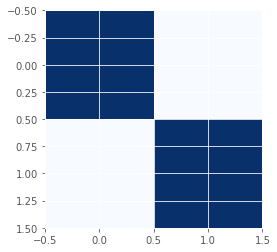

In [115]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
mushroom =pd.read_csv(url, header=None)
mushroom.columns = ["class",
"	cap-shape:	",
"	cap-surface:	",
"	cap-color:	",
"	bruises?:	",
"	odor:	",
"	gill-attachment:	",
"	gill-spacing:	",
"	gill-size:	",
"	gill-color:	",
"	stalk-shape:	",
"	stalk-root:	",
"	stalk-surface-above-ring:	",
"	stalk-surface-below-ring:	",
"	stalk-color-above-ring:	",
"	stalk-color-below-ring:	",
"	veil-type:	",
"	veil-color:	",
"	ring-number:	",
"	ring-type:	",
"	spore-print-color:	",
"	population:	",
"	habitat:	"]



mushroom = mushroom.set_index('class')

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(np.unique(mushroom.values))
mushroom = mushroom.apply(le.transform)


mushroom = mushroom.reset_index()

mushroom = shuffle(mushroom)
mushroom_X = mushroom[["	cap-shape:	",
"	cap-surface:	",
"	cap-color:	",
"	bruises?:	",
"	odor:	",
"	gill-attachment:	",
"	gill-spacing:	",
"	gill-size:	",
"	gill-color:	",
"	stalk-shape:	",
"	stalk-root:	",
"	stalk-surface-above-ring:	",
"	stalk-surface-below-ring:	",
"	stalk-color-above-ring:	",
"	stalk-color-below-ring:	",
"	veil-type:	",
"	veil-color:	",
"	ring-number:	",
"	ring-type:	",
"	spore-print-color:	",
"	population:	",
"	habitat:	"]]
mushroom_Y = mushroom[['class']]

np.random.seed(0)

mushroom_X_train = mushroom_X[:-200]
mushroom_y_train = mushroom_Y[:-200]
mushroom_X_test  = mushroom_X[-200:]
mushroom_y_test  = mushroom_Y[-200:]

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
kfold = model_selection.KFold(n_splits=5, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

model.fit(mushroom_X_train, mushroom_y_train)
mushroom_y_test['pred'] = model.predict(mushroom_X_test)

group_names = ['e','p']
print (pd.crosstab(mushroom_y_test['class'], mushroom_y_test['pred']))
print(classification_report(mushroom_y_test['class'], mushroom_y_test['pred'], target_names=group_names))

cf = pd.crosstab(mushroom_y_test['class'], mushroom_y_test['pred'])
plt.imshow(cf, cmap='Blues')

All of the mushroom classification models all delivered a 100% accuracy.  

## Twitter Analytics
- http://www.r-bloggers.com/getting-started-with-twitter-analysis-in-r/
- http://www.r-bloggers.com/in-depth-analysis-of-twitter-activity-and-sentiment-with-r/
- http://www.rdatamining.com/examples/text-mining 


In [246]:
import jsonpickle
import tweepy 
import csv

consumer_token = "PJcj3bbtl4EiwdDbRt8Ys1dvh"
consumer_secret = "HK2fhhmfyRctAP74UmnxL4disTVQrpN9k1PpCvgkfekG21kx3i"
access_key = "1872558674-XTX2hS59qFwNqlCUTlE3abJ8YqqKMNocxfz44AK"
access_secret = "PZ6RG1cxo6fxONGGpeSodYLDiczGIgmxAgDsU0WRM49q8"

auth = tweepy.AppAuthHandler(consumer_token, consumer_secret)
auth.secure = True
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

def tweepy_pull(username):

    searchQuery = username
    retweet_filter='-filter:retweets'
    q=searchQuery+retweet_filter
    tweetsPerQry = 1000
    fName = '%s_tweets.csv' % searchQuery
    sinceId = None
    maxTweets = 10000
    max_id = -1
    tweetCount = 0
    print("Downloading max {0} tweets".format(maxTweets))
    with open(fName, 'w') as f:
        while tweetCount < maxTweets:
            try:
                if (max_id <= 0):
                    if (not sinceId):
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry)
                    else:
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                                since_id=sinceId)
                else:
                    if (not sinceId):
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                                max_id=str(max_id - 1))
                    else:
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry,
                                                max_id=str(max_id - 1),
                                                since_id=sinceId)
                if not new_tweets:
                    print("No more tweets found")
                    break

                for tweet in new_tweets:
                    f.write(jsonpickle.encode(tweet._json['text'], unpicklable=False) +
                            '\n')
                tweetCount += len(new_tweets)
                print("Downloaded {0} tweets".format(tweetCount))
                max_id = new_tweets[-1].id
            except tweepy.TweepError as e:
                print("some error : " + str(e))
                break

    print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, fName))

In [247]:
tweepy_pull('CaesarsPalace')

Downloaded 97 tweets
Downloaded 197 tweets
Downloaded 297 tweets
Downloaded 397 tweets
Downloaded 497 tweets
Downloaded 597 tweets
Downloaded 697 tweets
Downloaded 797 tweets
Downloaded 897 tweets
Downloaded 997 tweets
Downloaded 1097 tweets
Downloaded 1195 tweets
Downloaded 1295 tweets
Downloaded 1395 tweets
Downloaded 1495 tweets
Downloaded 1595 tweets
Downloaded 1693 tweets
No more tweets found
Downloaded 1693 tweets, Saved to CaesarsPalace_tweets.csv


In [273]:
CP = pd.read_csv('CaesarsPalace_tweets.csv', header=None, error_bad_lines=False)

b'Skipping line 327: expected 1 fields, saw 4\nSkipping line 337: expected 1 fields, saw 4\nSkipping line 347: expected 1 fields, saw 4\nSkipping line 348: expected 1 fields, saw 4\nSkipping line 353: expected 1 fields, saw 4\nSkipping line 354: expected 1 fields, saw 4\nSkipping line 355: expected 1 fields, saw 4\nSkipping line 356: expected 1 fields, saw 4\nSkipping line 357: expected 1 fields, saw 4\nSkipping line 358: expected 1 fields, saw 4\nSkipping line 359: expected 1 fields, saw 4\nSkipping line 360: expected 1 fields, saw 4\nSkipping line 362: expected 1 fields, saw 4\nSkipping line 470: expected 1 fields, saw 3\nSkipping line 474: expected 1 fields, saw 3\nSkipping line 764: expected 1 fields, saw 3\nSkipping line 766: expected 1 fields, saw 3\nSkipping line 985: expected 1 fields, saw 2\nSkipping line 1161: expected 1 fields, saw 2\n'


In [274]:
print (str(1692 - len(CP)) + " tweets contained bad encoding and was not readable")

18 tweets contained bad encoding and was not readable


In [275]:
CP = CP.apply(lambda x: x.astype(str).str.lower())

In [276]:
CP.columns = ['tweet']
CP['tweet'] = CP['tweet'].str.replace('@', '')
CP['tweet'] = CP['tweet'].str.replace('#', '')
CP['tweet'] = CP['tweet'].str.replace('caesarspalace:', '')
CP['tweet'] = CP['tweet'].str.replace('rt', '')

In [277]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bryceeb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [278]:
CP["cleaned"] = CP["tweet"].str.lower().str.split()

CP['cleaned'] = CP['cleaned'].apply(lambda x: [item for item in x if item not in stop])

In [279]:
CP['cleaned']  = CP['cleaned'] .apply(' '.join)

In [280]:
CP['cleaned'] = CP['cleaned'].str.replace(r"([\\])\w+", ' ', case=False)
CP['cleaned'] = CP['cleaned'].str.replace(r"http\S+", ' ', case=False)

In [281]:
CP.head()

,tweet,cleaned
0,"caesarspalace gordonramsay yes, please! &lt;3","caesarspalace gordonramsay yes, please! &lt;3"
1,rachelfox5: celinedion opened her show tonigh...,rachelfox5: celinedion opened show tonight tal...
2,tech rehearsal cocktailcabaretlv opening nov. ...,tech rehearsal cocktailcabaretlv opening nov. ...
3,cybermonday: enjoy the best deals of the yea...,cybermonday: enjoy best deals year - 30% off. ...
4,what a beauty! \ud83c\udf54\ud83d\ude0d gord...,beauty! gordonramsay grhellskitchen comin...


In [282]:
from textblob import TextBlob
import nltk
CP['sentiment'] = CP['cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)
CP['nouns'] = CP['cleaned'].apply(lambda x: TextBlob(x).noun_phrases)

In [283]:
CP.head()

,tweet,cleaned,sentiment,nouns
0,"caesarspalace gordonramsay yes, please! &lt;3","caesarspalace gordonramsay yes, please! &lt;3",0.000000,[caesarspalace gordonramsay yes]
1,rachelfox5: celinedion opened her show tonigh...,rachelfox5: celinedion opened show tonight tal...,0.158333,[show wk]
2,tech rehearsal cocktailcabaretlv opening nov. ...,tech rehearsal cocktailcabaretlv opening nov. ...,0.000000,"[tech rehearsal cocktailcabaretlv opening nov,..."
3,cybermonday: enjoy the best deals of the yea...,cybermonday: enjoy best deals year - 30% off. ...,0.700000,[deals year]
4,what a beauty! \ud83c\udf54\ud83d\ude0d gord...,beauty! gordonramsay grhellskitchen comin...,0.000000,[gordonramsay grhellskitchen comingsoon behind...


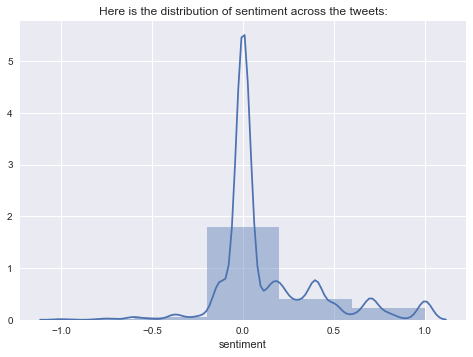

In [305]:
import seaborn as sn
sn.distplot(CP.sentiment, bins = 5);
plt.title("Here is the distribution of sentiment across the tweets:" )

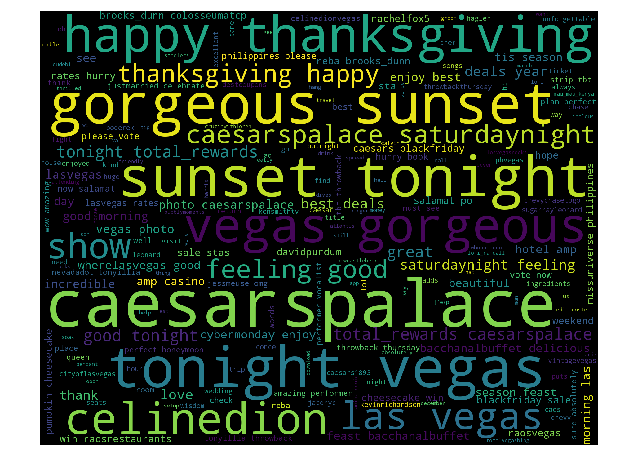

In [300]:
positive = CP[CP.sentiment > 0.6]

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

words = ' '.join(positive['cleaned'])

no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(no_urls_no_tags)


plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./caesarspalace_wordcloud_1.png', dpi=300)
plt.show()